Naveeda Ali
<br>
Due date: Jan. 16, 2024, 11:59pm
<br>
PHYS 2030 W24

## <center><font color=#46769B>Homework assignment 1</font></center>

__Rubric (100 points total)__:

- Problem 1 - __25 points__
     
- Problem 2 - __25 points__

- Problem 3 - __25 points__
     
- Problem 4 - __25 points__

## <font color=#46769B>Introduction:</font>

Required reading:
- *Lesson 1: Introduction to Monte Carlo sampling*
- *Lesson 2: Normal distributions*
</font>

## <font color=#46769B>Problem 1: Area of a circle revisited, error on $\pi$</font>

We return to computing the $\pi$ from our Monte Carlo simulation in Exercise 1. 
You noticed that your answer was close to the accepted value for $\pi$, but was not exact and changes each time you run your code. This is a fact of life for Monte Carlo simulations: it is inherently random.

Suppose you want to calculate $\pi$ to within an accuracy of $0.001$. The simple way to approach it is to simply increase $N$, rerunning your code over and over again until you notice the numbers are jumping around less than the desired accuracy.

Here we will follow a better and more quantitative approach in which we calculate the uncertainty on our result *directly from our sample* as the __standard error of the mean__. Then, we simply choose a suitably large $N$ so that the standard error of the mean falls below the desired level.

Let's introduce a new variable $z$, which will make the connection with the standard error of the mean (hopefully) more clear. We define $z$ as follows:
- $z = 1$ if point $x,y$ is within the unit circle
- $z = 0$ if point $x,y$ is outside the unit circle

Note that $p$ is the probability that $z=1$ (inside the circle) and $1-p$ is the probability that $z=0$ (outside the circle). That is, $z$ is has a Bernoulli PDF, just like flipping a coin:

$$P(z) = \left\{ \begin{array}{cc} p & z = 1 \\ 1-p & z = 0 \end{array}\right. \, .$$

(In the lecture notes, we wrote this distribution as $P(x)$. Here the variable $x$ is position in the $x$ direction, so we need a new variable name for the outcome of each "coin flip.")

What we calculated before as $N_{\rm in}/N$ is simply the mean of $z$:

$$ \langle z \rangle = \frac{N_{\rm in}}{N} \xrightarrow{N \to \infty} \bar{z} = p$$

We can also calculate the variance $\Delta z$ and the standard error of the mean $E_z = \Delta z/\sqrt{N}$.

Now, our estimate for $\pi$ is

$$\pi \approx 4 \langle z \rangle \, ,$$

So the standard error of the mean of $\pi$ is simply four times the standard error of the mean of $z$:

$$E_\pi = 4 E_z = 4 \frac{\Delta z}{\sqrt{N}} \, .$$

Define a function `estimate_pi(num)` that does the following:
- Generates `num` samples for $x$ and $y$ from a uniform distribution, as in Part (a). (Here `num` is the number of samples $N$.)
- From your samples for $x,y$, obtain samples for $z$. (That is, from each sample $x_i,y_i$, you decide if $z_i$ is $1$ or $0$.)
- Calculate the mean, standard deviation, and standard error of the mean for $z$.
- Returns your estimate for $\pi$ and the error $E_\pi$.

Evaluate your function and print your results $\pi$ and $E_\pi$, with a suitable value of $N$ such that $E_\pi$ is below $0.001$. 

In [1]:
import numpy as np
#NOTE: Some parts of assignment will take a while to run

#Set N (number of samples) to 12^6 for small error 
num = 12**6

#Define function estimate_pi
def estimate_pi(num):
    #Set z to an array of zeroes with length num
    z = np.zeros(num)
    for i in range(num):
        #Sample x values from uniform distribution (-1 to 1)
        x = np.random.uniform(-1,1)
        #Sample y values from uniform distribution (-1 to 1)
        y = np.random.uniform(-1,1)
        #If x and y values fall within unit circle then z=1, otherwise array value will stay z=0
        if (x**2 + y**2) <=1:
            z[i] = 1 
    #Calculate mean of z         
    mean_z = (np.mean(np.sum(z)))/(i+1)
    #Calculate error on z 
    er_z = (np.sum(z)/np.sqrt(num))/(i+1)
    #Calculate standard deviation of z
    stddev_z = np.sqrt(er_z)
    #Calculate pi using mean of z
    pi = 4*(mean_z)
    #Calculate error on pi by using error on z
    er_pi = (4*er_z)
    #Return pi and error on pi
    return pi, er_pi

#Call on function estimate_pi() for num samples
estimate_pi(num)


(3.1424602409122087, 0.0018185533801575282)

## <font color=#46769B>Problem 2: Buffon's needle experiment for estimating $\pi$</font>

__Buffon's needle__ is another classic problem in Monte Carlo sampling, originally posed by the 18th century naturalist and mathematician George-Louis Leclerc. The problem is as follows:
> Suppose you drop needles of length $\ell$ at random onto a floor that has a series of equidistant parallel lines, with separation distance $d$. Provided $\ell \le d$, the probability that a needle will cross a line on the floor is

$$p = \frac{2\ell}{\pi d} \, . \qquad {\rm (1)} $$

We will *not* prove this result analytically. (Proofs can be found online for the curious reader.) 

<img src="https://mathworld.wolfram.com/images/eps-svg/BuffonNeedle_700.svg" width=350px>

[Figure credit: Wolfram Mathworld](https://mathworld.wolfram.com/BuffonsNeedleProblem.html)

Here we will use this result to calculate $\pi$ using a Monte Carlo simulation with $N$ total needles dropped. For simplicity, we will set $\ell = d = 1$. By counting the number of needles that cross a line, $N_{\rm cross}$, the probability $p$ is approximately $N_{\rm cross}/N$ in the limit that $N$ is large. Therefore, rearranging Eq. (1), we have 

$$\pi \approx \frac{2 N}{N_{\rm cross}} \, . \qquad {\rm (2)} $$

Now, how do we simulate dropping a needle? Let's give some hints. Consider the figure below, showing a needle (thick black line) dropped near lines at $x=0$ and $x=1$. 

<img src="https://drive.google.com/uc?export=view&id=1zV1emttZcLRRVRu6T4yt4vorjyzAjmcZ" width=350px>

First, let $(x_1,y_1)$ be the position of one side. The figure below assumes that $0 < x_1 < 1$. In fact, this is the most general case we need to consider. Since $x_1$ will be between *some* pair of lines, we are free to label those two lines $x=0$ and $x=1$.

Next, let $(x_2,y_2)$ be the position of the other side. Using some trigonometry

$$(x_2,y_2) = (x_1 + \cos\theta, \, y_1 + \sin\theta)\, .$$

Now, depending on the angle $\theta$, we can have a line crossing or not. There is no line crossing if $0 < x_2 < 1$, while on the other hand there is a line crossing if $x_2 < 0$ or $x_2 > 1$. 

The needle can have any orientation, so any angle $\theta$ is allowed. Since we expect all orientations to be equally likely, we should sample $\theta$ from a uniform distribution.

Lastly, $y_1$ and $y_2$ are irrelevant, since we don't need to know them.

Now, let's summarize how to implement the sampling. 
- Generate $N$ samples for $x_1$ from a uniform distribution between $0$ and $1$. (We may as well call $x_1$ as just $x$ here, and drop the extra subscript.)
- Generate $N$ samples for $\theta$ from a uniform distribution between $0$ and $2\pi$.
- For each sample $x_i$ and $\theta_i$, check whether a line crossing has occurred: either

$$ x_i + \cos\theta_i < 0 \quad {\rm or} \quad x_i + \cos\theta_i > 1$$

- Count the number of samples with a line crossing $N_{\rm cross}$.
- Calculate $\pi$ from Eq. (3)

Your task is to write a code implementing the above steps, for $N=10^3$.

In [2]:
import numpy as np

#Set N (number of samples) to 10^3
num = 10**3
#Set counter for number of line crossings to zero
N_cross = 0

for i in range(num):
    #Generate values for x from uniform distribution (0,1)
    x = np.random.uniform(0,1)
    #Generate values for pi from uniform distribution (0, 2*pi)
    pi_samples = np.random.uniform(0, np.pi*2)
    #If line crossing has happened in for following x(i) and pi(i) then count is added to N_cross
    if (x+np.cos(pi_samples)) < 0 or (x+np.cos(pi_samples)) > 1:
        N_cross = N_cross + 1
        
#Estimate for pi is calculated from Eq. 2
pi_estimate = (2*num)/N_cross
print(pi_estimate)



3.1595576619273302


## <font color=#46769B>Problem 3: Buffon's needle continued, error on $\pi$</font>

Write a function `drop_needles(num)` that does the sampling you performed in Problem 2 and returns both $\pi$ and $E_\pi$, the error for $\pi$. Here the input `num` is $N$, the number of samples in your simulation, i.e., the number of needles dropped in the Buffon needle experiment.

Suppose we want to calculate $\pi$ to within an accuracy of $0.001$. What value of $N$ is required?

Hint: Let's follow a similar logic to Problem 1 above. We introduce a discrete variable $z$ that is either $z=1$ if the needle crosses a line, or $z=0$ if there is no crossing. Then we can calculate $\pi$ from the mean value of $z$, from Eq. (2): 

$$\pi \approx \frac{2}{\langle z \rangle} \, . \qquad (3)$$

The standard error on the mean of $z$ is calculated in the usual way

$$E_z = \frac{\Delta z}{\sqrt{N}} \, .$$

Finally, we can calculate the error $E_\pi$ from the following formula

$$E_\pi = \frac{2 E_z}{\langle z \rangle^2} \, . \qquad (4)$$

To summarize, the task of your function is as follows:
- Generate $N$ samples for $x$ and $\theta$, as in Part (a).
- Use these samples to calculate the samples for $z$ (similar to Exercise 1).
- Calculate the mean and standard error of the mean of $z$.
- Return $\pi$ and $E_\pi$, using Eqs. (3) and (4).

Note to the curious reader: Where did Eq. (4) come from? It may look mysterious, but it follows from a topic in statistics known as __propagation of uncertainties__, a topic which we are going to come back to. Here let's provide a quick proof of Eq. (4). 

The question is: how the error on $\langle z \rangle$, $E_z$, impact $\pi$? We quantify this by asking: what happens to $\pi$ if we perturb $\langle z \rangle$ by its error $\pm E_z$? Shifting $\langle z \rangle \to \langle z \rangle \pm E_z$, we have

$$\pi = \frac{2}{\langle z \rangle} \longrightarrow \frac{2}{\langle z \rangle \pm E_z}
= \frac{2}{\langle z \rangle} \times \left(1 \pm \frac{E_z}{\langle z\rangle} \right)^{-1}$$

Now, we can use an approximation that you may recall from your calculus course, $(1+a)^n \approx 1 + n a$, if $a$ is a small number ($a \ll 1$). Here $a$ is $\pm E_z/\langle z \rangle$ and $n=-1$. Then the above line becomes

$$\pi = \frac{2}{\langle z \rangle} \longrightarrow \frac{2}{\langle z\rangle} \mp \left(\frac{2E_z}{\langle z\rangle^2}\right) = \pi \mp \left(\frac{2E_z}{\langle z\rangle^2}\right) \, .$$

The factor in parentheses is the error $E_\pi$, as in Eq. (4).


In [3]:
import numpy as np

#Set N(number of samples) to 12^6 for small error
num = 12**6

#Define function drop_needles(num)
def drop_needles(num):
    #Set z to an array of zeroes with length of num
    z = np.zeros(num)
    for i in range(num):
        #Generate values for x from uniform distribution(0,1)
        x = np.random.uniform(0,1)
        #Generate values for pi from uniform distribution(0,2*pi)
        pi_samples = np.random.uniform(0, np.pi*2)
        #If line crossing has occured for following x(i) and pi(i) values then z(i) = 1, otherwise z(i) = 0 (stays zero)
        if (x+np.cos(pi_samples)) < 0 or (x+np.cos(pi_samples)) > 1:
            z[i] = 1
    #Calculate mean of z
    mean_pi = (np.mean(np.sum(z)))
    #Calculate estimate of pi from mean of z
    pi_estimate = (2/mean_pi)*(i+1)
    #Calculate error on z
    E_z = (np.sum(z)/np.sqrt(num))
    #Calcukate error on pi from error on z
    E_pi = ((2*E_z)/(mean_pi**2))*(i+1)
    return pi_estimate, E_pi

#Call on function drop_needles() for num samples
drop_needles(num)
        
 
    

(3.14051459069231, 0.0018174274251691613)

## <font color=#46769B>Problem 4: Sampling from normal distributions</font>

Write a code that performs the following tasks:
- Generate $N = 10^4$ samples for $x$ from a normal distribution $\mathcal{N}(\mu,\sigma)$, where $\mu = 3$ and $\sigma = 1$.
- Calculate and print the mean $\langle x \rangle$ and standard deviation $\Delta x$, and compare to $\mu$ and $\sigma$.
- Make a histogram plot for your samples for $x$ using `matplotlib.pyplot.hist()`.
- On the same plot, plot the normal PDF $\mathcal{N}(\mu,\sigma)$ as a function of $x$. 

For your plot:
- Label your plot with a legend and axis labels
- Choose the number of histogram bins appropriately
- Normalized the histogram correctly so that your PDF and histogram are in good agreement (set `density=True`)


The mean of samples for x is 2.9968127813693783 while mu of the normal distribution is 3.
The standard deviation of samples for x is 0.9953140297094597 while sigma of the normal distribution is 1.


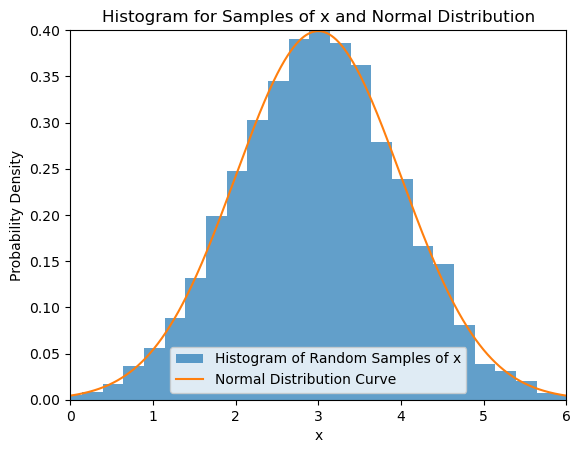

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#Set N (number of samples) to 10^4
num = 10**4
#Set mu of normal distribution to 3
mu = 3
#Set sigma of normmal distribution to 1
sigma = 1
#Generate random samples for x from normal distribution(mu, sigma)
x = np.random.normal(mu, sigma, num)

#Calculate mean of samples for x
mean_x = np.mean(x)
#Calculate standard deviation of samples for x
std_x = np.std(x)

print('The mean of samples for x is', mean_x, 'while mu of the normal distribution is 3.')
print('The standard deviation of samples for x is', std_x, 'while sigma of the normal distribution is 1.')

#Plot histogram  for randomly sampled x values generated from normal distribution(mu,sigma)
plt.hist(x, bins=30, density=True, alpha=0.7, label="Histogram of Random Samples of x")

#Generate values for x axis for normal PDF equation
xi = np.linspace(0, 6, num) 
#Calculate values for y from normal PDF equation 
N = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * (xi - mu)**2 / sigma**2)  # Use xi instead of x here
#Plot x and y values for bell-shaped normal distribution curve
plt.plot(xi, N, label='Normal Distribution Curve')

#Set x axis limits on graph
plt.xlim([0, 6])
#Set y axis limits on graph
plt.ylim([0, 0.40])

#Plot title of graph
plt.title('Histogram for Samples of x and Normal Distribution')
#Plot x axis label
plt.xlabel('x')
#Plot y axis label 
plt.ylabel('Probability Density')
#Plot legend elements
plt.legend()

#Display the plot
plt.show()

